In [1]:
import supervenn, pandas, matplotlib_venn

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# define annotations for later

In [3]:
annotation_file = '/Users/adrian/research/egilsstadir/results/deseq2/annotation.tsv'
annotation = pandas.read_csv(annotation_file, sep='\t')
annotation

,Unnamed: 0,ensembl_transcript_id,ensembl_gene_id,external_gene_name,gene_biotype,description
0,1,ENST00000387314,ENSG00000210049,MT-TF,Mt_tRNA,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,2,ENST00000389680,ENSG00000211459,MT-RNR1,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,3,ENST00000387342,ENSG00000210077,MT-TV,Mt_tRNA,mitochondrially encoded tRNA-Val (GUN) [Source...
3,4,ENST00000387347,ENSG00000210082,MT-RNR2,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,5,ENST00000386347,ENSG00000209082,MT-TL1,Mt_tRNA,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...
...,...,...,...,...,...,...
278215,278216,ENST00000441160,ENSG00000228437,LINC02474,lncRNA,long intergenic non-protein coding RNA 2474 [S...
278216,278217,ENST00000412098,ENSG00000229463,LYST-AS1,lncRNA,LYST antisense RNA 1 [Source:HGNC Symbol;Acc:H...
278217,278218,ENST00000438371,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...
278218,278219,ENST00000715678,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...


# super venn

In [4]:
input_dir = '/Users/adrian/research/egilsstadir/results/deseq2/'

df = pandas.read_csv(input_dir+'effect_WT_vs_KO.tsv', sep='\t', index_col=0)
a = set(df.index)
print(len(a))

df = pandas.read_csv(input_dir+'effect_202low_vs_KO.tsv', sep='\t', index_col=0)
b = set(df.index)
print(len(b))

df = pandas.read_csv(input_dir+'effect_202high_vs_KO.tsv', sep='\t', index_col=0)
c = set(df.index)
print(len(c))

df = pandas.read_csv(input_dir+'effect_202high_vs_202low.tsv', sep='\t', index_col=0)
d = set(df.index)
print(len(d))

834
1450
1687
1469


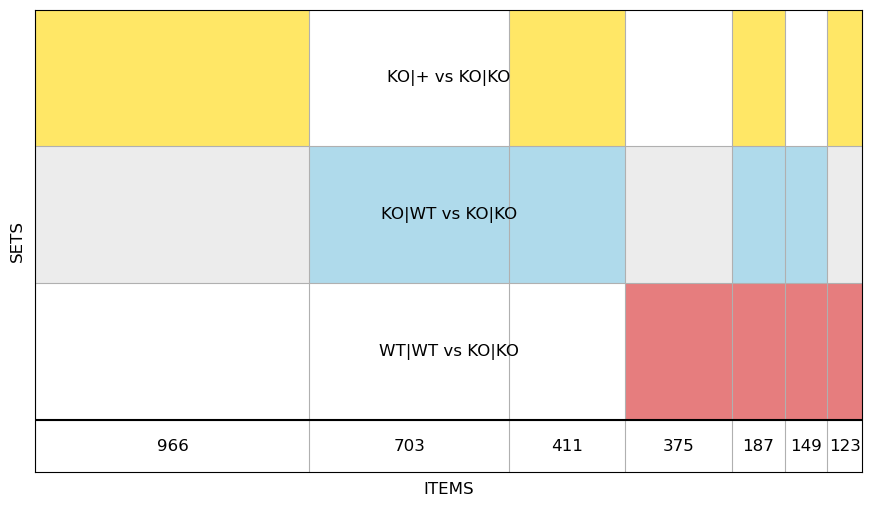

In [5]:
sets = [a, b, c]
labels = ['WT|WT vs KO|KO', 'KO|WT vs KO|KO', 'KO|+ vs KO|KO']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', 
                          reverse_sets_order=False, fontsize=12, color_cycle=['tab:red', 'skyblue', 'gold', 'tab:green'])

matplotlib.pyplot.show()

In [6]:
print(703 + 411 + 187 + 149)
print(375 + 187 + 149 + 123)

1450
834


In [7]:
%%time

# explore what happened with the effect of restoring 201, independently of the levels
sub = mso.chunks[frozenset([1, 2])]
print(len(sub))

container4table = []

for ensembl in list(sub):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    biotype = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['gene_biotype'].values))[0].split(' [')[0]
    print('{}\t{}\t{}\t{}'.format(ensembl, symbol, description, biotype))

    # fill up for storing info as a table
    container4table.append([ensembl, symbol, description, biotype])

# finalize & store table
print('storing file...')
table = pandas.DataFrame(container4table, columns=['ENSEMBL', 'Symbol', 'Description', 'Biotype'])
table.set_index('ENSEMBL', inplace=True)

label = 'fill_this_label_otherwise_tables_will_overwrite'
table_file = label + '.xlsx'
table.to_excel(table_file)

411
ENSG00000251144	nan	novel transcript	lncRNA
ENSG00000120324	PCDHB10	protocadherin beta 10	protein_coding
ENSG00000112304	ACOT13	acyl-CoA thioesterase 13	protein_coding
ENSG00000103241	FOXF1	forkhead box F1	protein_coding
ENSG00000107099	DOCK8	dedicator of cytokinesis 8	protein_coding
ENSG00000185483	ROR1	receptor tyrosine kinase like orphan receptor 1	protein_coding
ENSG00000091073	DTX2	deltex E3 ubiquitin ligase 2	protein_coding
ENSG00000170074	FAM153A	family with sequence similarity 153 member A	protein_coding
ENSG00000196812	ZSCAN16	zinc finger and SCAN domain containing 16	protein_coding
ENSG00000213199	ASIC3	acid sensing ion channel subunit 3	protein_coding
ENSG00000189334	S100A14	S100 calcium binding protein A14	protein_coding
ENSG00000172331	BPGM	bisphosphoglycerate mutase	protein_coding
ENSG00000178950	GAK	cyclin G associated kinase	protein_coding
ENSG00000114248	LRRC31	leucine rich repeat containing 31	protein_coding
ENSG00000267040	ATP8B1-AS1	ATP8B1 antisense RNA 1	lncRNA

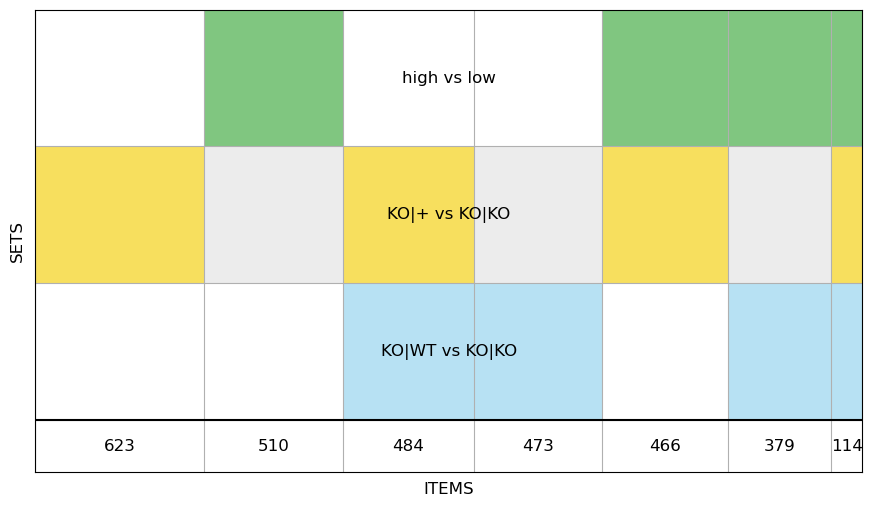

In [8]:
sets = [b, c, d]
labels = ['KO|WT vs KO|KO', 'KO|+ vs KO|KO', 'high vs low']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', 
                          reverse_sets_order=False, fontsize=12, color_cycle=['skyblue', 'gold', 'tab:green'])

matplotlib.pyplot.show()

In [9]:
print(510 + 466 + 379 + 114)
print(623 + 484 + 466 + 114)

1469
1687


In [10]:
# explore 202 dose response: intersect of high vs KO with high vs low
sub = mso.chunks[frozenset([1, 2])]
print(len(sub))

for ensembl in list(sub):
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    print('{}\t{}\t{}'.format(ensembl, symbol, description))

466
ENSG00000120337	TNFSF18	TNF superfamily member 18
ENSG00000169903	TM4SF4	transmembrane 4 L six family member 4
ENSG00000289423	nan	novel transcript
ENSG00000152284	TCF7L1	transcription factor 7 like 1
ENSG00000183287	CCBE1	collagen and calcium binding EGF domains 1
ENSG00000189056	RELN	reelin
ENSG00000124939	SCGB2A1	secretoglobin family 2A member 1
ENSG00000154153	RETREG1	reticulophagy regulator 1
ENSG00000198743	SLC5A3	solute carrier family 5 member 3
ENSG00000104953	TLE6	TLE family member 6, subcortical maternal complex member
ENSG00000171522	PTGER4	prostaglandin E receptor 4
ENSG00000133657	ATP13A3	ATPase 13A3
ENSG00000153982	GDPD1	glycerophosphodiester phosphodiesterase domain containing 1
ENSG00000167183	PRR15L	proline rich 15 like
ENSG00000226250	LINC00408	long intergenic non-protein coding RNA 408
ENSG00000288927	nan	novel transcript
ENSG00000155792	DEPTOR	DEP domain containing MTOR interacting protein
ENSG00000276085	CCL3L3	C-C motif chemokine ligand 3 like 3
ENSG0000010423